In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

### Pearson’s Correlation Coefficient Tests: 
whether two samples have a linear relationship.

Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

In [5]:
#Input the data
df = pd.read_csv('https://raw.githubusercontent.com/flyandlure/datasets/master/housing.csv')
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


Notes: We want to compare this to examine correlations to the target variable 'median_house_value'. So we need to turn all of the data to similar data types. 

In [8]:
#First, clean data so all strings are lowercase 
df['ocean_proximity'] = df['ocean_proximity'].str.lower().replace('[^0-9a-zA-Z]+','_',regex=True)
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [18]:
#changing the proximity columns as boolean counts
#get_dummies get dummy codes for columns
encodings = pd.get_dummies(df['ocean_proximity'], prefix='proximity')
encodings.head().T

,0,1,2,3,4
proximity__1h_ocean,0,0,0,0,0
proximity_inland,0,0,0,0,0
proximity_island,0,0,0,0,0
proximity_near_bay,1,1,1,1,1
proximity_near_ocean,0,0,0,0,0


In [12]:
#then combining both df together
df = pd.concat([df, encodings], axis=1)
df.sample(5).T

,10592,2457,2993,2914,18357
longitude,-117.78,-119.65,-119.09,-119.08,-122.1
latitude,33.69,36.51,35.3,35.36,37.36
housing_median_age,16.0,30.0,3.0,12.0,32.0
total_rooms,3400.0,1671.0,2821.0,6442.0,1433.0
total_bedrooms,501.0,319.0,519.0,1116.0,199.0
population,1575.0,966.0,1353.0,2966.0,498.0
households,488.0,282.0,495.0,1092.0,201.0
median_income,6.0961,3.1333,3.6852,4.5791,9.3586
median_house_value,295500.0,100000.0,109800.0,123400.0,500001.0
ocean_proximity,_1h_ocean,inland,inland,inland,near_bay


In [13]:
## Let's discover correlations of the proximity and median_house_value:
df[df.columns[1:]].corr()['median_house_value'][:].sort_values(ascending=False).to_frame()
## .corr uses Pandas to find Pearson's r correlations 

#median house value: the higher this number, the higher the housing cost
#proximity inland: the futher inland, the lower the house value

,median_house_value
median_house_value,1.000000
median_income,0.688075
proximity__1h_ocean,0.256617
proximity_near_bay,0.160284
proximity_near_ocean,0.141862
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
proximity_island,0.023416


Text(0.5, 1.0, 'Total rooms vs. Median house value')

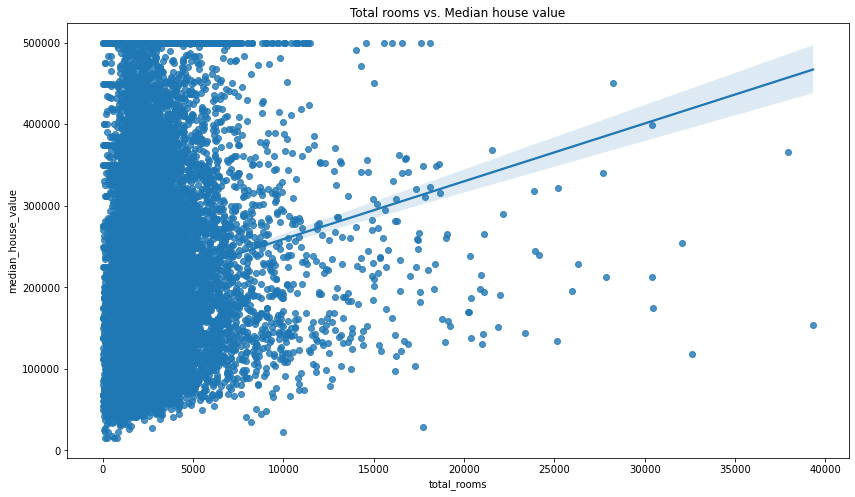

In [19]:
#we can plot to find other correlations too

plt.figure(figsize=(14,8))
sns.regplot(x=df["total_rooms"], y=df["median_house_value"])
plt.title('Total rooms vs. Median house value')

___________________________________________________________________________